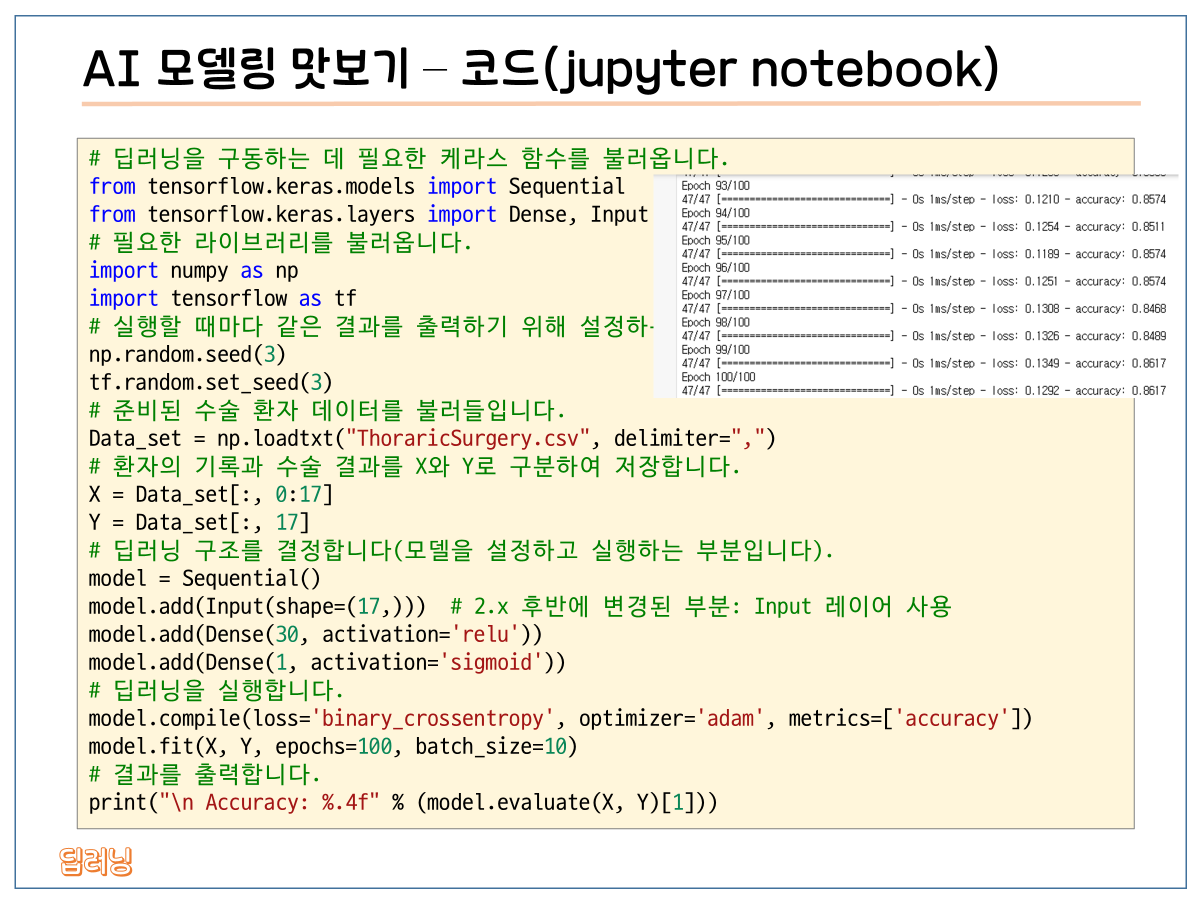

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

import numpy as np
import tensorflow as tf


In [ ]:
np.random.seed(3)
tf.random.set_seed(3)

Data_set = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ICT/ThoraricSurgery.csv", delimiter=',')

X = Data_set[:, 0:17]
Y = Data_set[:, 17]

model = Sequential()
model.add(Input(shape=(17,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=10)

print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8254 - loss: 2.0389
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8433 - loss: 0.6993
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8275 - loss: 0.5881
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8422 - loss: 0.5400
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8456 - loss: 0.5270
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.5195
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.5121
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.5074
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - loss: 0.5005
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - loss: 0.4945
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8538 - loss: 0.4894
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

from torch.utils.data import TensorDataset, DataLoader

np.random.seed(3)
torch.manual_seed(3)

Data_set = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/ICT/ThoraricSurgery.csv', delimiter=',')

X = Data_set[:, 0:17]
Y = Data_set[:, 17]

X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1) # (N, ) -> (N, 1)

dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(17, 30)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


model = MyModel()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 100

for epoch in range(epochs):
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model.forward(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

with torch.no_grad():
    outputs = model.forward(X_tensor)
    predicted = (outputs >= 0.5).float()
    accuracy = (predicted.eq(Y_tensor).sum().item()) / Y_tensor.shape[0]

print(f'\nAccuracy: {accuracy:.4f}')


Epoch: 10/100, Loss: 0.5053
Epoch: 20/100, Loss: 0.2390
Epoch: 30/100, Loss: 0.5781
Epoch: 40/100, Loss: 0.2735
Epoch: 50/100, Loss: 0.3359
Epoch: 60/100, Loss: 0.3575
Epoch: 70/100, Loss: 0.3619
Epoch: 80/100, Loss: 0.1882
Epoch: 90/100, Loss: 0.0762
Epoch: 100/100, Loss: 0.4220

Accuracy: 0.8511


## 선형회귀 연습

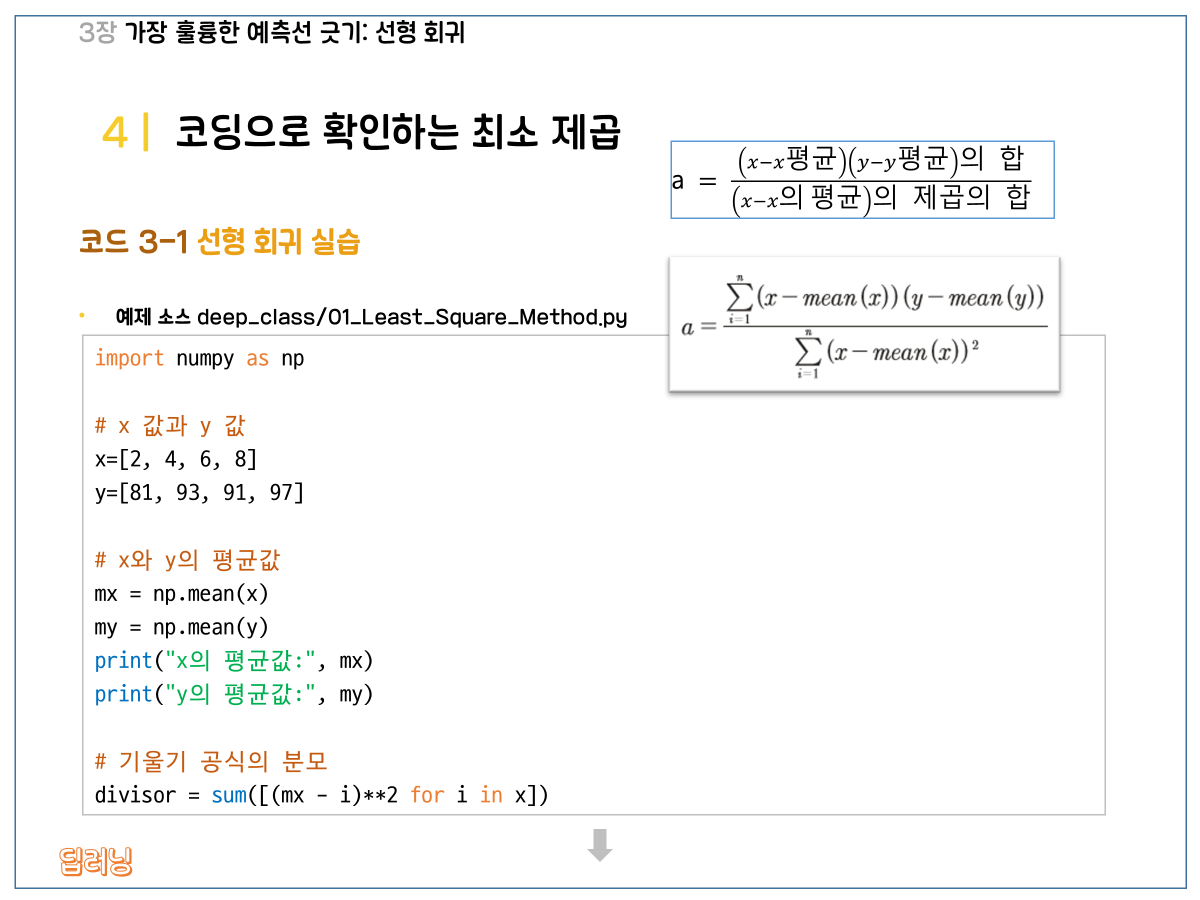

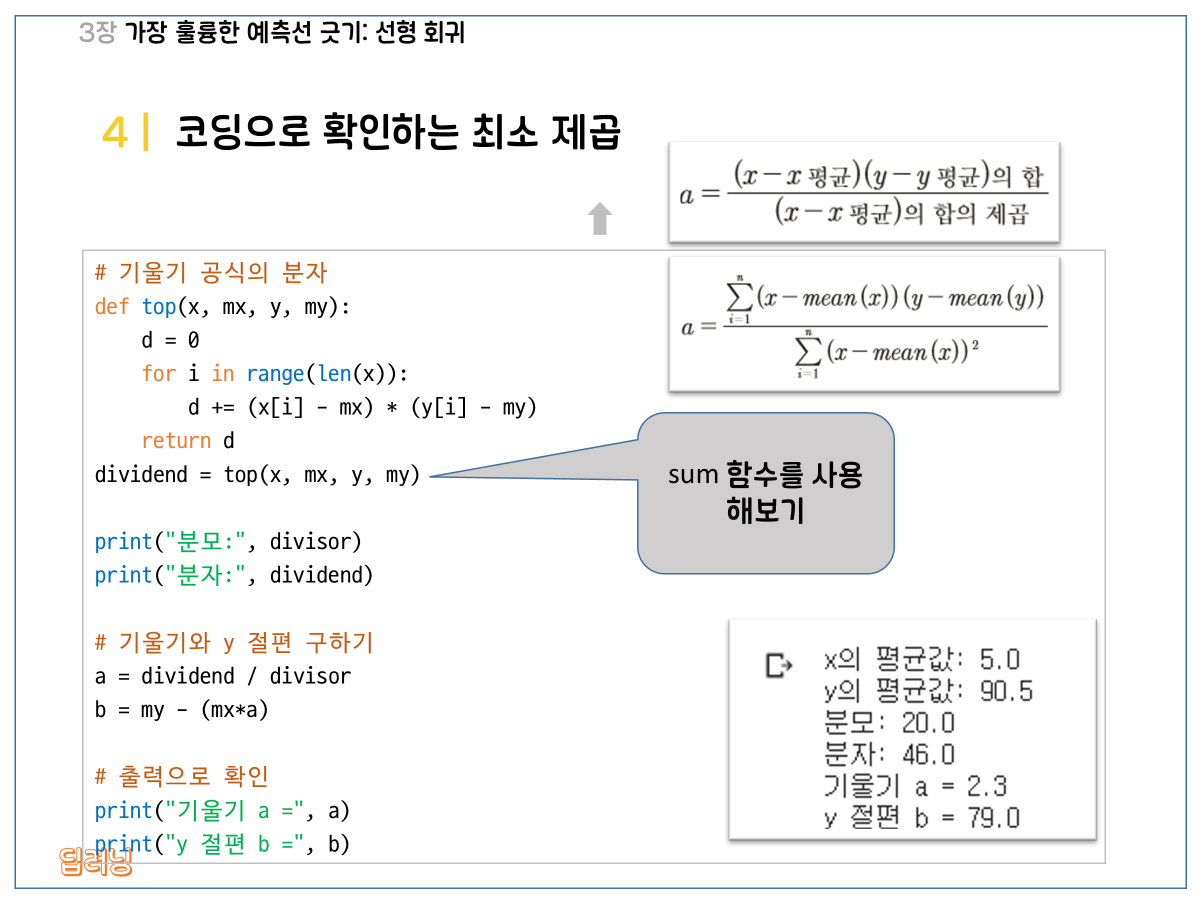

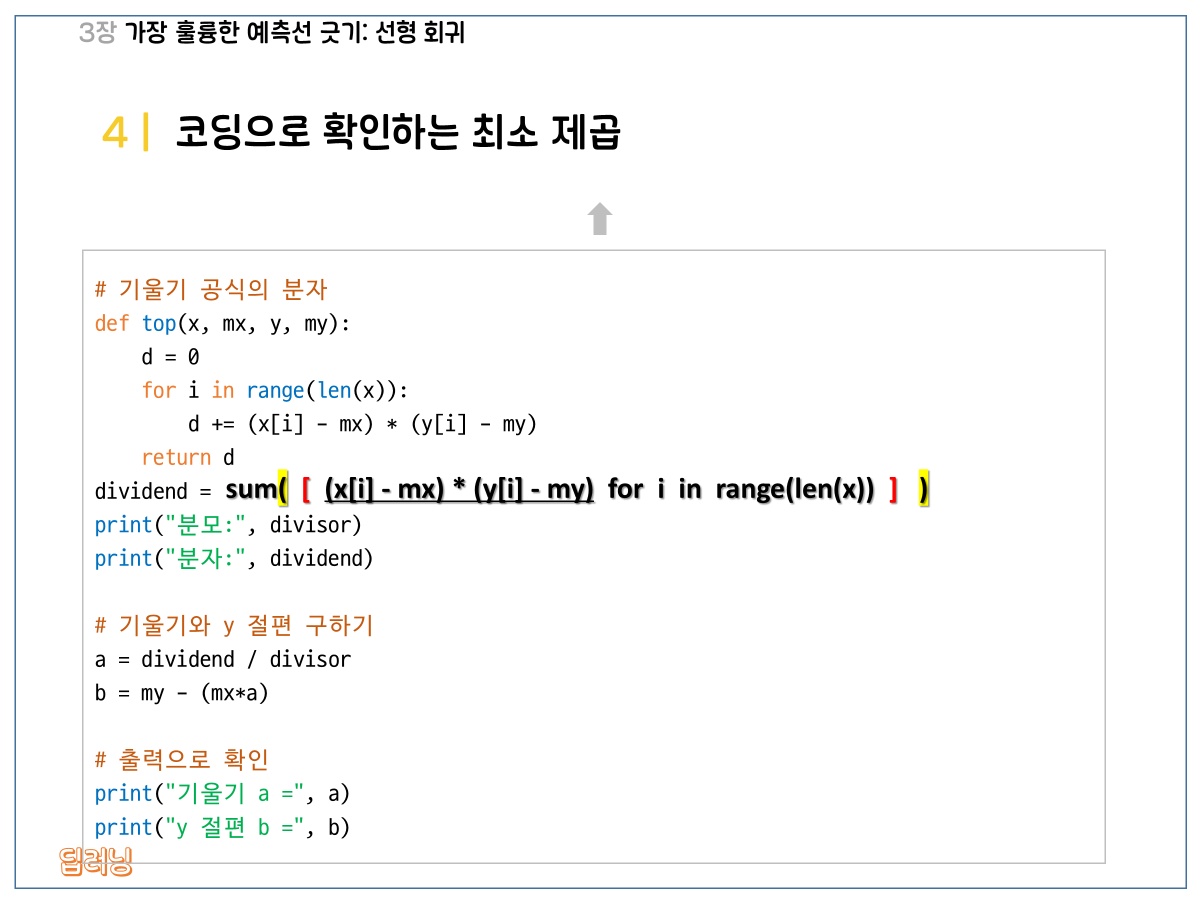

In [6]:
import numpy as np

x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

mx = np.mean(x)
my = np.mean(y)

print(f"x의 평균 값: {mx}")
print(f"y의 평균 값: {my}")

divisor = sum([(mx-i)**2 for i in x]) # 분자는 (평균 - x값)들의 제곱의 합
dividend = sum([(x[i] - mx) * (y[i] - my) for i in range(len(x))]) # 분모는 (x값 - x평균)과 (y값 - y평균)의 곱의 합

print(f"분모: {divisor}")
print(f"분자: {dividend}")


a = dividend / divisor # 기울기
b = my - (mx * a) # y 절편

print(f"기울기 a = {a}")
print(f"y 절편 b = {b}")



x의 평균 값: 5.0
y의 평균 값: 90.5
분모: 20.0
분자: 46.0
기울기 a = 2.3
y 절편 b = 79.0


In [9]:
import numpy as np

x = list(range(1,9))
y = [0.2, 0.3, 0.5, 0.6, 0.9, 0.95, 1.1, 1.5]

mx = np.mean(x)
my = np.mean(y)

print(f"x의 평균 값: {mx}")
print(f"y의 평균 값: {my}")

divisor = sum([(mx - i)**2 for i in x])
dividend = sum([(x[i] - mx) * (y[i] - my) for i in range(len(x))])

print(f"분모: {divisor}")
print(f"분자: {dividend}")

a = dividend / divisor
b = my - (mx * a)

print(f"기울기 a = {a}")
print(f"y 절편 b = {b}")

print("==========")

def func(a, b, x):
    result = a * x + b
    if result >= 30:
        result = 30
    return result

print(f"15 주 후 크기 : {func(a, b, 15)}")
print(f"22 주 후 크기 : {func(a, b, 22)}")
print(f"77 주 후 크기 : {func(a, b, 77)}")
print(f"200 주 후 크기 : {func(a, b, 200)}")

print("==========")

print(f"예상 5주 후 크기 : {func(a, b, 5)}")
print(f"실제 5주 후 크기 : {y[4]}")


x의 평균 값: 4.5
y의 평균 값: 0.7562500000000001
분모: 42.0
분자: 7.375
기울기 a = 0.17559523809523808
y 절편 b = -0.03392857142857131
15 주 후 크기 : 2.5999999999999996
22 주 후 크기 : 3.8291666666666666
77 주 후 크기 : 13.48690476190476
200 주 후 크기 : 30
예상 5주 후 크기 : 0.8440476190476192
실제 5주 후 크기 : 0.9
